In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

from glob import glob

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Get data

In [5]:
import urllib.request
url = 'https://archive.org/download/food-5-k/Food-5K.zip'
filename = 'Food-5K.zip'
urllib.request.urlretrieve(url, filename)

('Food-5K.zip', <http.client.HTTPMessage at 0x1c86c525850>)

In [6]:
!tar -xf Food-5K.zip

In [22]:
!dir Food-5K

 Volume in drive C is OS
 Volume Serial Number is 58C1-98B9

 Directory of C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K

07/30/2024  09:03 PM    <DIR>          .
07/30/2024  09:08 PM    <DIR>          ..
09/15/2019  12:15 PM    <DIR>          evaluation
09/15/2019  12:15 PM    <DIR>          training
09/15/2019  12:15 PM    <DIR>          validation
               0 File(s)              0 bytes
               5 Dir(s)  12,534,353,920 bytes free


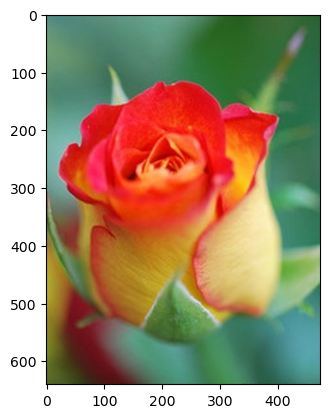

In [23]:
# look at an image for fun
plt.imshow(image.load_img('Food-5K/training/0_808.jpg'))
plt.show()

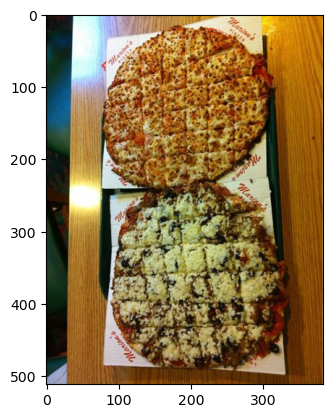

In [24]:
# Food images start with 1, non-food images start with 0
plt.imshow(image.load_img('Food-5K/training/1_616.jpg'))
plt.show()

In [25]:
!mkdir data

In [27]:
# Make directories to store the data Keras-style
!mkdir data\train
!mkdir data\test
!mkdir data\train\nonfood
!mkdir data\train\food
!mkdir data\test\nonfood
!mkdir data\test\food

In [28]:
# move the images
# Note: we will consider 'training' to be the train set
#       'validation' folder will be the test set
#       ignore the 'evaluation' set
!move Food-5K\training\0*.jpg data\train\nonfood
!move Food-5K\training\1*.jpg data\train\food
!move Food-5K\validation\0*.jpg data\test\nonfood
!move Food-5K\validation\1*.jpg data\test\food

C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\0_0.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\0_1.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\0_10.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\0_100.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\0_1000.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\0_1001.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\0_1002.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learni

C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\1_0.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\1_1.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\1_10.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\1_100.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\1_1000.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\1_1001.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\training\1_1002.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learni

C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\0_0.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\0_1.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\0_10.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\0_100.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\0_101.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\0_102.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\0_103.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_tran

C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\1_0.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\1_1.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\1_10.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\1_100.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\1_101.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\1_102.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_transfer_learning\Food-5K\validation\1_103.jpg
C:\Users\Asus\Documents\tensorflow_2_0_deep_learning_and_artificial_intelligence\09_tran

In [29]:
train_path = 'data/train'
valid_path = 'data/test'

In [30]:
# load images in to the same smaller size
IMAGE_SIZE = [200, 200]

In [31]:
# useful for getting number of files
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [32]:
image_files

['data/train\\food\\1_0.jpg',
 'data/train\\food\\1_1.jpg',
 'data/train\\food\\1_10.jpg',
 'data/train\\food\\1_100.jpg',
 'data/train\\food\\1_1000.jpg',
 'data/train\\food\\1_1001.jpg',
 'data/train\\food\\1_1002.jpg',
 'data/train\\food\\1_1003.jpg',
 'data/train\\food\\1_1004.jpg',
 'data/train\\food\\1_1005.jpg',
 'data/train\\food\\1_1006.jpg',
 'data/train\\food\\1_1007.jpg',
 'data/train\\food\\1_1008.jpg',
 'data/train\\food\\1_1009.jpg',
 'data/train\\food\\1_101.jpg',
 'data/train\\food\\1_1010.jpg',
 'data/train\\food\\1_1011.jpg',
 'data/train\\food\\1_1012.jpg',
 'data/train\\food\\1_1013.jpg',
 'data/train\\food\\1_1014.jpg',
 'data/train\\food\\1_1015.jpg',
 'data/train\\food\\1_1016.jpg',
 'data/train\\food\\1_1017.jpg',
 'data/train\\food\\1_1018.jpg',
 'data/train\\food\\1_1019.jpg',
 'data/train\\food\\1_102.jpg',
 'data/train\\food\\1_1020.jpg',
 'data/train\\food\\1_1021.jpg',
 'data/train\\food\\1_1022.jpg',
 'data/train\\food\\1_1023.jpg',
 'data/train\\food\\1

In [33]:
# useful for getting number of classes
folders = glob(train_path + '/*')
folders

['data/train\\food', 'data/train\\nonfood']

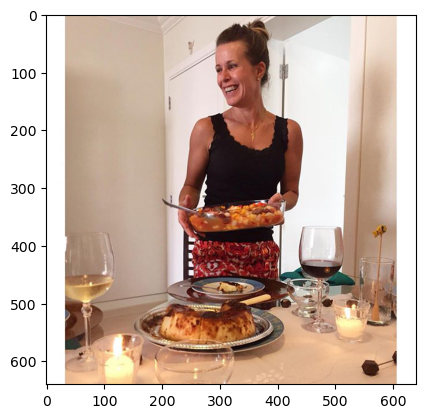

In [34]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

## Create model from pretrained VGG16

In [35]:
# load pretrained VGG16 model with pre-trained weights on imagenet dataset
# DO NOT include the top 3 layers of the network -> include_top = False
ptm = VGG16(input_shape=IMAGE_SIZE + [3],
           weights='imagenet',
           include_top=False)

In [36]:
# map the data into feature vectors
x = Flatten()(ptm.output)

In [37]:
# create a model object
model = Model(inputs=ptm.input, outputs=x)

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [39]:
# create an instance of ImageDataGenerator
# NO data augmentation here
gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [40]:
BATCH_SIZE = 128

# create generators
train_generator = gen.flow_from_directory(directory=train_path,
                                           target_size=IMAGE_SIZE,
                                           shuffle=True,
                                           batch_size=BATCH_SIZE,
                                           class_mode='binary')

valid_generator = gen.flow_from_directory(directory=valid_path,
                                          target_size=IMAGE_SIZE,
                                          batch_size=BATCH_SIZE,
                                          class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [42]:
Ntrain = len(image_files)
Nvalid = len(valid_image_files)

# figure out output size
feat = model.predict(np.random.random([1] + IMAGE_SIZE + [3]))

D = feat.shape[1]

X_train = np.zeros((Ntrain, D))
Y_train = np.zeros(Ntrain)
X_valid = np.zeros((Nvalid, D))
Y_valid = np.zeros(Nvalid)

1/1 [==============================] - 1s 585ms/step


In [43]:
D

18432

In [44]:
# populate X_train and Y_train with predictions using the pretrained model
i = 0
for x, y in train_generator:
    # get features
    features = model.predict(x)
    
    # size of the batch
    sz = len(y)
    
    # assign to X_train and Y_train
    X_train[i:i+sz] = features
    Y_train[i:i+sz] = y
    
    # increment i
    i += sz
    print(i)
    
    if i >= Ntrain:
        print('breaking now')
        break
        
print(i)

4/4 [==============================] - 19s 5s/step
128
4/4 [==============================] - 18s 5s/step
256
4/4 [==============================] - 18s 5s/step
384
4/4 [==============================] - 19s 5s/step
512
4/4 [==============================] - 18s 5s/step
640
4/4 [==============================] - 18s 5s/step
768
4/4 [==============================] - 19s 5s/step
896
4/4 [==============================] - 19s 5s/step
1024
4/4 [==============================] - 19s 5s/step
1152
4/4 [==============================] - 19s 5s/step
1280
4/4 [==============================] - 19s 5s/step
1408
4/4 [==============================] - 19s 5s/step
1536
4/4 [==============================] - 18s 5s/step
1664
4/4 [==============================] - 19s 5s/step
1792
4/4 [==============================] - 19s 5s/step
1920
4/4 [==============================] - 19s 5s/step
2048
4/4 [==============================] - 19s 5s/step
2176
4/4 [==============================] - 19s 5s/step
2304

In [45]:
# populate X_valid and Y_valid with predictions using the pretrained model
i = 0
for x, y in valid_generator:
    # get features
    features = model.predict(x)
    
    # size of the batch
    sz = len(y)
    
    # assign to X_valid and Y_valid
    X_valid[i:i+sz] = features
    Y_valid[i:i+sz] = y
    
    # increment i
    i += sz
    print(i)
    
    if i >= Nvalid:
        print('breaking now')
        break
        
print(i)

4/4 [==============================] - 19s 5s/step
128
4/4 [==============================] - 19s 5s/step
256
4/4 [==============================] - 19s 5s/step
384
4/4 [==============================] - 19s 5s/step
512
4/4 [==============================] - 19s 5s/step
640
4/4 [==============================] - 19s 5s/step
768
4/4 [==============================] - 18s 5s/step
896
4/4 [==============================] - 15s 4s/step
1000
breaking now
1000


In [46]:
X_train.max(), X_train.min()

(650.8261108398438, 0.0)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train2 = scaler.fit_transform(X_train)
X_valid2 = scaler.transform(X_valid)

In [48]:
# try the built-in logistic regression

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train2, Y_train)

LogisticRegression()

In [49]:
print(logr.score(X_train2, Y_train))
print(logr.score(X_valid2, Y_valid))

1.0
0.983


In [55]:
# Do logistic regression in Tensorflow

i = Input(shape=(D,))
x = Dense(1, activation='sigmoid')(i)
linearmodel = Model(i, x)

In [56]:
linearmodel.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [57]:
# can try both normalized and unnormalized data
r = linearmodel.fit(X_train2, Y_train,
                   batch_size=BATCH_SIZE,
                   epochs=10,
                   validation_data=(X_valid2, Y_valid))

Epoch 1/10
24/24 [==============================] - 1s 15ms/step - loss: 0.1478 - accuracy: 0.9383 - val_loss: 0.0568 - val_accuracy: 0.9770
Epoch 2/10
24/24 [==============================] - 0s 6ms/step - loss: 0.0116 - accuracy: 0.9977 - val_loss: 0.0529 - val_accuracy: 0.9770
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 0.9780
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0510 - val_accuracy: 0.9790
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9790
Epoch 6/10
24/24 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0512 - val_accuracy: 0.9790
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0510 - val_accuracy: 0.9790
Epoch 8/10
24/24 [=

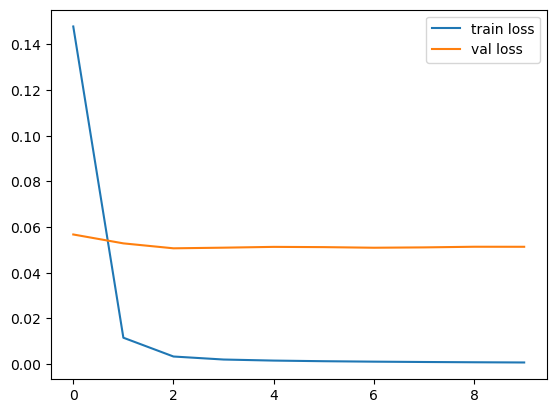

In [58]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

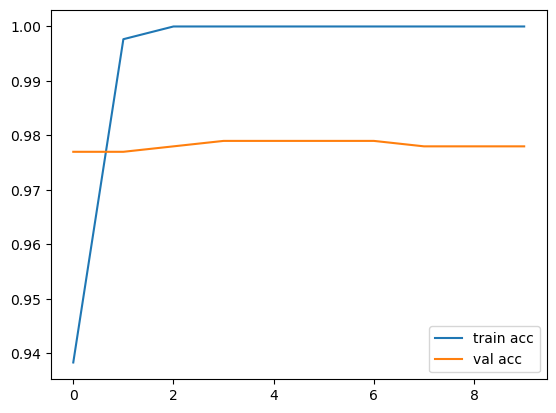

In [59]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
